<h1>Workflow</h1>

<pre>Import important libraries<br>
Get data ready (turn into tensors)<br>
Built a LinearRegression model<br>
Pick a loss function and optimizer<br>
Build a training loop<br>
Evaluate your model<br>
Test modrl with a new data point<br>
Save the model</pre>

<h2>Import important libraries</h2>

In [66]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h3>Get Data ready (turn into tensors)</h3>

In [67]:
df = pd.read_csv("practice.csv")
df

Hours Studied (x_train)  Exam Score (y_train)
0                     3.300                 1.700
1                     4.400                 2.760
2                     5.500                 2.090
3                     6.710                 3.190
4                     6.930                 1.694
5                     4.168                 1.573
6                     9.779                 3.366
7                     6.182                 2.596
8                     7.590                 2.530
9                     2.167                 1.221
10                    7.042                 2.827
11                   10.791                 3.465
12                    5.313                 1.650
13                    7.997                 2.904
14                    3.100                 1.300

In [68]:
x_train = df.drop("Exam Score (y_train)",axis=1)
x_train

Hours Studied (x_train)
0                     3.300
1                     4.400
2                     5.500
3                     6.710
4                     6.930
5                     4.168
6                     9.779
7                     6.182
8                     7.590
9                     2.167
10                    7.042
11                   10.791
12                    5.313
13                    7.997
14                    3.100

In [69]:
y_train = df.drop("Hours Studied (x_train)",axis=1)
y_train

Exam Score (y_train)
0                  1.700
1                  2.760
2                  2.090
3                  3.190
4                  1.694
5                  1.573
6                  3.366
7                  2.596
8                  2.530
9                  1.221
10                 2.827
11                 3.465
12                 1.650
13                 2.904
14                 1.300

<h3>Convert into numpy array</h3>

In [70]:
x_train = x_train.to_numpy()
x_train

array([[ 3.3  ],
       [ 4.4  ],
       [ 5.5  ],
       [ 6.71 ],
       [ 6.93 ],
       [ 4.168],
       [ 9.779],
       [ 6.182],
       [ 7.59 ],
       [ 2.167],
       [ 7.042],
       [10.791],
       [ 5.313],
       [ 7.997],
       [ 3.1  ]])

In [71]:
y_train = y_train.to_numpy()
y_train, y_train.dtype

(array([[1.7  ],
        [2.76 ],
        [2.09 ],
        [3.19 ],
        [1.694],
        [1.573],
        [3.366],
        [2.596],
        [2.53 ],
        [1.221],
        [2.827],
        [3.465],
        [1.65 ],
        [2.904],
        [1.3  ]]),
 dtype('float64'))

<h3>Plot into pyplot</h3>

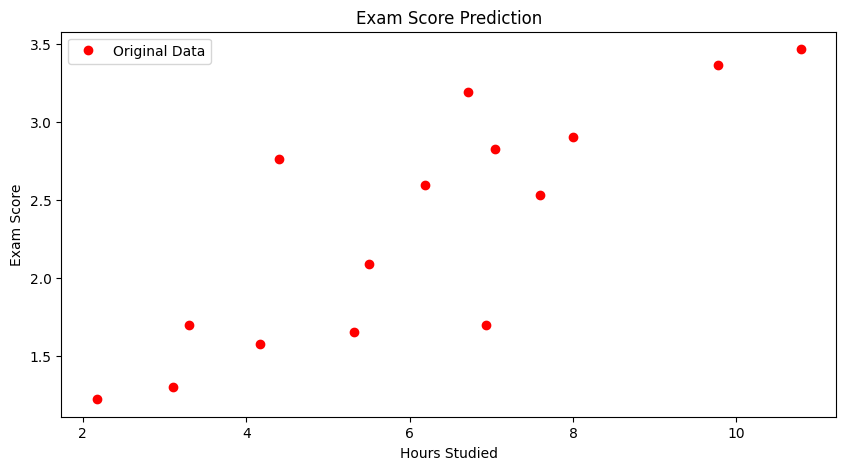

In [72]:
fig = plt.figure(figsize=(10,5))
plt.plot(x_train,y_train,'ro',label='Original Data')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.title('Exam Score Prediction')
plt.show()

<h3>Convert into pytorch tensor</h3>

In [73]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [74]:
x_train, y_train

(tensor([[ 3.3000],
         [ 4.4000],
         [ 5.5000],
         [ 6.7100],
         [ 6.9300],
         [ 4.1680],
         [ 9.7790],
         [ 6.1820],
         [ 7.5900],
         [ 2.1670],
         [ 7.0420],
         [10.7910],
         [ 5.3130],
         [ 7.9970],
         [ 3.1000]], dtype=torch.float64),
 tensor([[1.7000],
         [2.7600],
         [2.0900],
         [3.1900],
         [1.6940],
         [1.5730],
         [3.3660],
         [2.5960],
         [2.5300],
         [1.2210],
         [2.8270],
         [3.4650],
         [1.6500],
         [2.9040],
         [1.3000]], dtype=torch.float64))

In [76]:
x_train = x_train.type(torch.FloatTensor) #to change into 32-bit
y_train = y_train.type(torch.FloatTensor)

<h3>Using the type() method:</h3>
<p>
x = x.type(torch.FloatTensor) <br>

torch.FloatTesor = torch.float32 <br> 
torch.DoubleTensor = torch.float64 <br>
torch.IntTensor = torch.int32 <br>
</p>


<h3>Using the to() method:</h3>
<p>
x = x.to(torch.float16) <br>
</p>

<h3>2 .Build a Linear Regresson model</h3>

In [79]:
class LinearRegresson(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)
    def forward(self,x):
        out = self.linear(x)
        return out

In [80]:
model = LinearRegresson()

In [81]:
model

LinearRegresson(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [82]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-0.6019]])),
             ('linear.bias', tensor([-0.9197]))])

<h3>3. Pick a loss Function and Optimizer</h3>

In [83]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-4) #0.0001

<h3>4. Build a training loop</h3>

In [84]:
num_epochs = 1000

In [85]:
for epoch in range(num_epochs):
    model.train()
    out = model(x_train)
    loss = criterion(out, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch +1) % 20 == 0:
        print(f"Epoch: [{epoch+1} / {num_epochs}], loss: {loss.item():.6f}")

Epoch: [20 / 1000], loss: 37.398743
Epoch: [40 / 1000], loss: 26.568399
Epoch: [60 / 1000], loss: 18.914032
Epoch: [80 / 1000], loss: 13.504257
Epoch: [100 / 1000], loss: 9.680836
Epoch: [120 / 1000], loss: 6.978564
Epoch: [140 / 1000], loss: 5.068659
Epoch: [160 / 1000], loss: 3.718755
Epoch: [180 / 1000], loss: 2.764627
Epoch: [200 / 1000], loss: 2.090213
Epoch: [220 / 1000], loss: 1.613486
Epoch: [240 / 1000], loss: 1.276473
Epoch: [260 / 1000], loss: 1.038201
Epoch: [280 / 1000], loss: 0.869714
Epoch: [300 / 1000], loss: 0.750550
Epoch: [320 / 1000], loss: 0.666242
Epoch: [340 / 1000], loss: 0.606569
Epoch: [360 / 1000], loss: 0.564306
Epoch: [380 / 1000], loss: 0.534349
Epoch: [400 / 1000], loss: 0.513089
Epoch: [420 / 1000], loss: 0.497976
Epoch: [440 / 1000], loss: 0.487206
Epoch: [460 / 1000], loss: 0.479507
Epoch: [480 / 1000], loss: 0.473977
Epoch: [500 / 1000], loss: 0.469981
Epoch: [520 / 1000], loss: 0.467070
Epoch: [540 / 1000], loss: 0.464924
Epoch: [560 / 1000], loss: 0

In [ ]:
"""1:37:00 / 2:56:17"""

In [ ]:
a
s2+